In [18]:
import pandas as pd
import numpy as np


In [51]:
# import nltk
# # nltk.download('stopwords')
# from nltk.corpus import stopwords
# import re
# stop = stopwords.words('english')

In [4]:
train=pd.read_csv('preprocessed_train_data.csv',index_col=0)

In [52]:
test=pd.read_csv('preprocessed_testdata.csv',index_col=0)

In [86]:
test_labels=pd.read_csv('test_labels.csv',index_col=0)

In [92]:
test_labels.shape

(153164, 6)

In [93]:
test_labels[test_labels['toxic']!=-1].shape

(63978, 6)

In [95]:
test_labels.reset_index(inplace=True,drop=True)

In [99]:
ind=test_labels[test_labels['toxic']!=-1].index

In [101]:
test_labels[test_labels['toxic']!=-1]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0,0,0,0,0,0
7,0,0,0,0,0,0
11,0,0,0,0,0,0
13,0,0,0,0,0,0
14,0,0,0,0,0,0
16,0,0,0,0,0,0
17,0,0,0,0,0,0
19,0,0,0,0,0,0
21,1,0,0,0,0,0
22,0,0,0,0,0,0


In [107]:
test=test.iloc[ind,:]

In [108]:
test.reset_index(drop=True,inplace=True)

In [42]:
type(test)

pandas.core.frame.DataFrame

In [43]:
test.columns

Index(['comment_text'], dtype='object')

In [41]:
test.head()

,comment_text
id,
00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
0000247867823ef7,== From RfC == \n\n The title is fine as it is...
00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
00017563c3f7919a,":If you have a look back at the source, the in..."
00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,aww matches background colour seemingly stuck ...,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0


In [39]:
def remove_stopWords(s):
    s = ' '.join(word for word in s.split() if word not in stop)
    return s

def preprocess(words):
    
    ##words = words.apply(lambda x: x.decode('utf-8').strip())
    #words = words.apply(lambda x: x.lower())
    words = words.apply(lambda x : x.lower())
    # to remove number and puncuation
    words = words.apply(lambda x : " ".join(re.findall('[\w]+',x)))
    # to remove stop words
    words = words.apply(lambda x: remove_stopWords(x))
    # to keep only alphabet string
#     words = words.apply(lambda x : " ".join(re.findall('[^a-zA-Z]',x)))
    return words

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorize=TfidfVectorizer()


In [8]:
corpus=train.loc[:,'comment_text']

In [9]:
corpus.tolist()

['explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired 89 205 38 27',
 'aww matches background colour seemingly stuck thanks talk 21 51 january 11 2016 utc',
 'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
 'make real suggestions improvement wondered section statistics later subsection types accidents think references may need tidying exact format ie date format etc later one else first preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns listed relevant form eg wikipedia good_article_nominations transport',
 'sir hero chance remember page',
 'congratulations well use tools well talk',
 'cocksucker piss around work',
 'vandalism matt shirvington article reverted please banned',
 'sorry word nonsense offensive anyway

In [15]:
corpus_list=[for x in corpus]

0         explanation edits made username hardcore metal...
1         aww matches background colour seemingly stuck ...
2         hey man really trying edit war guy constantly ...
3         make real suggestions improvement wondered sec...
4                             sir hero chance remember page
5                  congratulations well use tools well talk
6                               cocksucker piss around work
7         vandalism matt shirvington article reverted pl...
8         sorry word nonsense offensive anyway intending...
9                      alignment subject contrary dulithgow
10        fair use rationale image wonju jpg thanks uplo...
11                         bbq man lets discuss maybe phone
12        hey talk exclusive group wp talibans good dest...
13        start throwing accusations warnings lets revie...
14        oh girl started arguments stuck nose belong be...
15        juelz santanas age 2002 juelz santana 18 years...
16                  bye look come think 

In [7]:
tfi=vectorize.fit(train['comment_text'].values.astype('U'))

In [8]:
tfi

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [9]:
train_data=tfi.transform(train['comment_text'].values.astype('U'))

In [13]:
test_data=tfi.transform(test['comment_text'].values.astype('U'))

NameError: name 'test' is not defined

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [16]:
LR=LogisticRegression(C=0.1,solver='sag',class_weight='balanced')

In [31]:
LR_unbalanced=LogisticRegression(C=0.1,solver='sag')

In [20]:
GB=GaussianNB()

In [11]:
train_data[0]

<1x189630 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [12]:
col=['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [13]:
from sklearn.model_selection import cross_val_score

In [19]:
roc_scores=[]

In [ ]:
for c in col:
    print(c)
    
    sc=np.mean(cross_val_score(GB,train_data.todense(),train[c],scoring='roc_auc'))
    
    
    print("roc_auc"+str(sc))
    print("precision:"+str(np.mean(cross_val_score(LR,train_data.todense(),train[c],scoring='precision'))))

    
    print("recall:"+str(np.mean(cross_val_score(LR,train_data.todense(),train[c],scoring='recall'))))
    
    print("accuracy:"+str(np.mean(cross_val_score(LR,train_data.todense(),train[c],scoring='accuracy'))))
#     roc_scores.append(sc)
      
    
#     LR.fit(train_data,train[c])
 

toxic


In [14]:
from sklearn.metrics import precision_recall_curve

In [55]:
for c in col:
    print(c)
    
    crossValidFunc(LR_unbalanced,train_data,train[c])


toxic
----------------------------------------------------------
train mean accuracy 93.41 +/- 0.01
test mean accuracy 93.35 +/- 0.09
train mean precision 98.47 +/- 0.04
test mean precision 98.35 +/- 0.17
train mean recall 31.77 +/- 0.18
test mean recall 31.13 +/- 0.46
train confusion matrix
[115361     60   8348   3887]
test confusion matrix
[28839    16  2106   952]
severe_toxic
----------------------------------------------------------
train mean accuracy 99.03 +/- 0.01
test mean accuracy 99.02 +/- 0.06
train mean precision 61.42 +/- 2.53
test mean precision 60.44 +/- 10.98
train mean recall 7.31 +/- 0.32
test mean recall 7.00 +/- 1.25
train confusion matrix
[126322     58   1182     93]
test confusion matrix
[31580    14   296    22]
obscene
----------------------------------------------------------
train mean accuracy 96.54 +/- 0.01
test mean accuracy 96.50 +/- 0.05
train mean precision 97.41 +/- 0.08
test mean precision 97.20 +/- 0.54
train mean recall 35.66 +/- 0.13
test mean re

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


train mean accuracy 99.70 +/- 0.01
test mean accuracy 99.70 +/- 0.04
train mean precision 0.00 +/- 0.00
test mean precision 0.00 +/- 0.00
train mean recall 0.00 +/- 0.00
test mean recall 0.00 +/- 0.00
train confusion matrix
[127274      0    382      0]
test confusion matrix
[31818     0    95     0]
insult
----------------------------------------------------------
train mean accuracy 96.13 +/- 0.03
test mean accuracy 96.10 +/- 0.12
train mean precision 87.63 +/- 0.36
test mean precision 87.07 +/- 1.94
train mean recall 25.12 +/- 0.30
test mean recall 24.59 +/- 1.24
train confusion matrix
[121131    223   4718   1582]
test confusion matrix
[30281    57  1188   387]
identity_hate
----------------------------------------------------------
train mean accuracy 99.13 +/- 0.01
test mean accuracy 99.13 +/- 0.05
train mean precision 78.88 +/- 7.86
test mean precision 88.25 +/- 17.26
train mean recall 1.30 +/- 0.13
test mean recall 1.30 +/- 0.61
train confusion matrix
[126528      4   1109     

In [54]:
for c in col:
    print(c)
    
    crossValidFunc(LR,train_data,train[c])


toxic
----------------------------------------------------------
train mean accuracy 93.94 +/- 0.02
test mean accuracy 93.25 +/- 0.05
train mean precision 63.15 +/- 0.09
test mean precision 60.80 +/- 0.51
train mean recall 88.34 +/- 0.11
test mean recall 83.30 +/- 0.46
train confusion matrix
[109115   6306   1426  10808]
test confusion matrix
[27213  1642   510  2548]
severe_toxic
----------------------------------------------------------


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


train mean accuracy 97.38 +/- 0.06
test mean accuracy 97.24 +/- 0.09
train mean precision 27.42 +/- 0.35
test mean precision 24.86 +/- 1.24
train mean recall 98.17 +/- 0.23
test mean recall 87.02 +/- 2.37
train confusion matrix
[123064   3316     23   1252]
test confusion matrix
[30755   839    41   277]
obscene
----------------------------------------------------------
train mean accuracy 97.39 +/- 0.03
test mean accuracy 97.01 +/- 0.13
train mean precision 69.08 +/- 0.35
test mean precision 66.94 +/- 1.30
train mean recall 91.71 +/- 0.12
test mean recall 86.13 +/- 0.78
train confusion matrix
[118123   2774    560   6198]
test confusion matrix
[29505   719   234  1455]
threat
----------------------------------------------------------
train mean accuracy 95.12 +/- 2.18
test mean accuracy 95.05 +/- 2.17
train mean precision 6.81 +/- 3.94
test mean precision 5.83 +/- 2.53
train mean recall 90.51 +/- 1.64
test mean recall 81.22 +/- 8.72
train confusion matrix
[121081   6193     36    346]

In [20]:
for c in col:
    print(c)
    
    sc=np.mean(cross_val_score(LR,train_data,train[c],scoring='roc_auc'))
    
    
    print("roc_auc"+str(sc))
    print("precision:"+str(np.mean(cross_val_score(LR,train_data,train[c],scoring='precision'))))

    
    print("recall:"+str(np.mean(cross_val_score(LR,train_data,train[c],scoring='recall'))))
    
    print("accuracy:"+str(np.mean(cross_val_score(LR,train_data,train[c],scoring='accuracy'))))
    roc_scores.append(sc)
      
    
    LR.fit(train_data,train[c])
  
#     print(LR.predict_proba(test_data)[:,1])

toxic
roc_auc0.9605004982119302
precision:0.6062412553898445
recall:0.8254871191316857
accuracy:0.931879847626866
severe_toxic


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


roc_auc0.9855452763275984


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


precision:0.2504961796249179


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


recall:0.8539321467510584


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


accuracy:0.9724198250882132
obscene
roc_auc0.9818205647234223
precision:0.6736307972086406
recall:0.8520535073175849
accuracy:0.9703016272675447
threat


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


roc_auc0.9638612947434685


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


precision:0.046767526888289834


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


recall:0.8305293501048219


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


accuracy:0.9786928226190769
insult
roc_auc0.9728067298223523
precision:0.5310226382882965
recall:0.8434682237454515
accuracy:0.9554931647021996
identity_hate


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


roc_auc0.9724719588602914


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


precision:0.16693366525913464


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


recall:0.7878905229651498


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


accuracy:0.9661091467540027


In [83]:
train.shape

(159571, 7)

In [75]:
train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,1,1,1,0,1,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [53]:
import numpy
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)
kfold = KFold(n_splits=5,random_state=2)
Ytrind = {}
Xtrind = {}
Ytesind={}
Xtesind={}

tracc =[]
teacc=[]
import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix
def crossValidFunc(model,Xtrain,Ytrain):
    global tracc,teacc
    tracc =[]
    teacc=[]
    
    trpre=[]
    tepre=[]
    
    trrec=[]
    terec=[]
    
    conf_train=np.zeros((2,2))
    conf_test=np.zeros((2,2))
    
    
    count=0
    Ytrain = numpy.array(Ytrain)
#     print(Xtrain.shape)
#     print(Ytrain.shape)
    print("----------------------------------------------------------")
    for train_index,test_index in kfold.split(Xtrain):  
        val =count+1
        msg = "...Started Fold Splitting=> "  +  str(val)
#         print(msg,datetime.datetime.now())
        X_train, X_test = Xtrain[train_index], Xtrain[test_index]
        y_train, y_test = Ytrain[train_index], Ytrain[test_index]
        Ytrind[count] = y_train
        Ytesind[count] = y_test    
        Xtrind[count] = X_train
        Xtesind[count] = X_test


        modelfit = model.fit(X_train,y_train)
#         print(modelfit)
        ytrpred = model.predict(X_train)
    
        conf_train+=confusion_matrix(y_train,ytrpred)
    
        acctr =accuracy_score(y_train,ytrpred)*100
#         print("Train Accuracy for fold",val,"       =>  ",acctr)
#         print(confusion_matrix(y_train,ytrpred))
        tracc.append(acctr)
        trpre.append(precision_score(y_train,ytrpred)*100)
        trrec.append(recall_score(y_train,ytrpred)*100)
    

    
        ytestpred = model.predict(X_test)

        
        conf_test+=confusion_matrix(y_test,ytestpred)        
        
        
        accte =accuracy_score(y_test,ytestpred)*100
#         print("Test Accuracy for fold",val,"       =>  ",accte)
        teacc.append(accte)
        tepre.append(precision_score(y_test,ytestpred)*100)
        terec.append(recall_score(y_test,ytestpred)*100)    
#         print(confusion_matrix(y_train,ytrpred))
#         print("----------------------------------------------------------")
        count+=1
    print("train mean accuracy %.2f +/- %.2f"%(np.mean(tracc),np.std(tracc)))
    print("test mean accuracy %.2f +/- %.2f"%(np.mean(teacc),np.std(teacc)))       

    print("train mean precision %.2f +/- %.2f"%(np.mean(trpre),np.std(trpre)))
    print("test mean precision %.2f +/- %.2f"%(np.mean(tepre),np.std(tepre)))       
     
    print("train mean recall %.2f +/- %.2f"%(np.mean(trrec),np.std(trrec)))
    print("test mean recall %.2f +/- %.2f"%(np.mean(terec),np.std(terec)))       
    
    print("train confusion matrix")
    print((conf_train/5).astype('int').ravel())
    print("test confusion matrix")    
    print((conf_test/5).astype('int').ravel())    

In [104]:
#pca
def Visual(X,labels):
    from sklearn.decomposition import TruncatedSVD,PCA
    from matplotlib import pyplot
    
    col = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
    pyplot.figure(figsize=(12,8))
    pca = TruncatedSVD(n_components=2)
    
    for c in col:
        print
#         print(labels[labels[c]==1].index)
        
        ind=labels[labels[c]==1].index
#         print(X[ind,:].shape)
#         break
        res = pca.fit_transform(X[ind,:])
        pyplot.scatter(res[:, 0], res[:, 1], label=c)
        
    pyplot.legend(loc='upper right')
    pyplot.rcParams.update({'font.size': 22})

    pyplot.show()
   

In [101]:
train_data[:,0:100]

<159571x100 sparse matrix of type '<class 'numpy.float64'>'
	with 2155 stored elements in Compressed Sparse Row format>

In [ ]:
Visual(train_data,train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']])

In [14]:
total_featres=np.array(tfi.get_feature_names())

In [3]:
sorted_tfidf=np.argsort(train_data.toarray()).flatten()[::-1]

NameError: name 'np' is not defined

In [2]:
sorted_tfidf

NameError: name 'sorted_tfidf' is not defined

In [18]:
from wordcloud import Wordcloud


ImportError: cannot import name 'Wordcloud' from 'wordcloud' (/anaconda3/lib/python3.7/site-packages/wordcloud/__init__.py)

In [122]:
from sklearn.decomposition import PCA

In [139]:
non_zero=train[~((train['toxic']==0)&(train['severe_toxic']==0)&(train['obscene']==0)&(train['threat']==0)&(train['insult']==0)&(train['identity_hate']==0))].index

In [1]:
X=train_data.todense()

NameError: name 'train_data' is not defined

In [ ]:
X=train_data[non_zero].todense()

In [ ]:
Y=train[non_zero]

In [ ]:
def Visual(X,labels):
    from sklearn.decomposition import PCA
    from matplotlib import pyplot
   
    pca = PCA(n_components=2)
    res =  pca.fit_transform(X)
    pyplot.figure(figsize=(20, 10))
    pyplot.scatter(res[:, 0], res[:, 1])


IndexError: index 10000 is out of bounds for axis 0 with size 10000

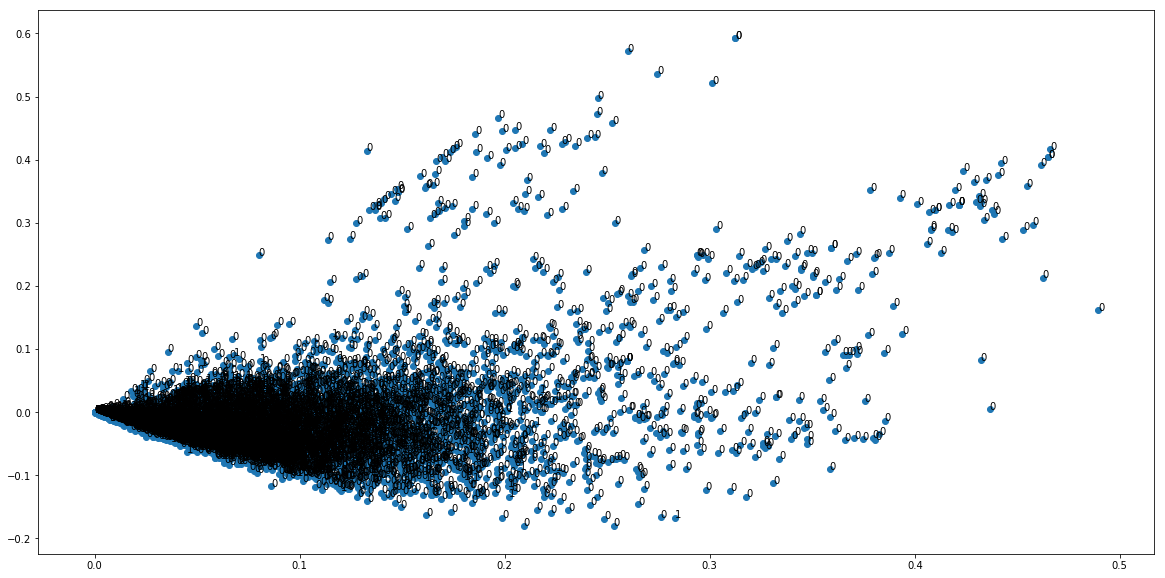

In [131]:
Visual(train_data[0:10000],train.loc[0:10000,'toxic'])

In [128]:
def Visual(X,labels):
    from sklearn.decomposition import TruncatedSVD
    from matplotlib import pyplot
   
    pca = TruncatedSVD(n_components=2)
    res =  pca.fit_transform(X)
    pyplot.figure(figsize=(20, 10))
    pyplot.scatter(res[:, 0], res[:, 1])

    for i, word in enumerate(labels):
        pyplot.annotate(word, xy=(res[i, 0], res[i, 1]))
    pyplot.show()
    pass


In [135]:
type(train_data[0:1000].todense())

numpy.matrixlib.defmatrix.matrix

In [44]:
train.shape[0]/(2*(np.bincount(train['toxic'])))

array([0.55300221, 5.21678436])

In [42]:
(train['toxic']).tolist().count(1)

15294

In [38]:
feature_array=np.array(tfi.get_feature_names())

In [ ]:
train_data